# Repository Lab

In [14]:
from bcd.container import BCDContainer
from bcd.config import Config
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
Config.set_log_level('INFO')
Config.set_mode('exp')

In [3]:
container = BCDContainer()
container.init_resources()
container.wire(
    packages=[
        "bcd.dal.repo",  
    ]
)

## Task Repository

In [7]:
repo = container.dal.task_repo()
meta, tasks = repo.get_by_stage(stage_id=1)
meta

,uid,mode,stage_id,stage,method,params,images_processed,created
0,bc98d41a-9e54-427a-affa-d29a93352cff,exp,1,Denoise,MeanFilter,"{""kernel"": 3}",36,2023-11-08 17:40:18
1,59751f9f-f60c-4761-8ffc-52fc3afd463b,exp,1,Denoise,MeanFilter,"{""kernel"": 5}",36,2023-11-08 17:40:18
2,6b869669-d1e5-4417-ba4f-a949522e33d3,exp,1,Denoise,MeanFilter,"{""kernel"": 7}",36,2023-11-08 17:40:18
3,61549067-9d7f-4376-b374-119b3ad286d6,exp,1,Denoise,MedianFilter,"{""kernel"": 3}",36,2023-11-08 17:41:21
4,1654c21b-b7e1-475d-a0c0-7a3728ac38c0,exp,1,Denoise,MedianFilter,"{""kernel"": 5}",36,2023-11-08 17:41:21
5,8ca4154e-1ed3-40dd-a892-22a749027705,exp,1,Denoise,MedianFilter,"{""kernel"": 7}",36,2023-11-08 17:41:21
6,d830d68e-2611-4608-8bcf-beb516559c89,exp,1,Denoise,GaussianFilter,"{""kernel"": 3}",36,2023-11-08 17:42:42
7,10bcf768-5766-41dc-b6c1-8e05a83bec04,exp,1,Denoise,GaussianFilter,"{""kernel"": 5}",36,2023-11-08 17:42:42
8,ae93551d-9c23-4072-a1bc-ed8dae9aa7fe,exp,1,Denoise,GaussianFilter,"{""kernel"": 7}",36,2023-11-08 17:42:42


## Evaluation Repository

In [13]:
repo = container.dal.eval_repo()
evals = repo.get()
evals.drop(columns=['params'], inplace=True)
evals = evals.merge(meta[['uid', 'params']], how='left', left_on='task_id', right_on='uid')
evals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   orig_uid          324 non-null    object        
 1   test_uid          324 non-null    object        
 2   mode              324 non-null    object        
 3   stage_id          324 non-null    int64         
 4   stage             324 non-null    object        
 5   method            324 non-null    object        
 6   image_view        324 non-null    object        
 7   abnormality_type  324 non-null    object        
 8   assessment        324 non-null    int64         
 9   cancer            324 non-null    int64         
 10  build_time        324 non-null    float64       
 11  task_id           324 non-null    object        
 12  mse               324 non-null    float64       
 13  psnr              324 non-null    float64       
 14  ssim              324 non-

<Axes: xlabel='method', ylabel='psnr'>

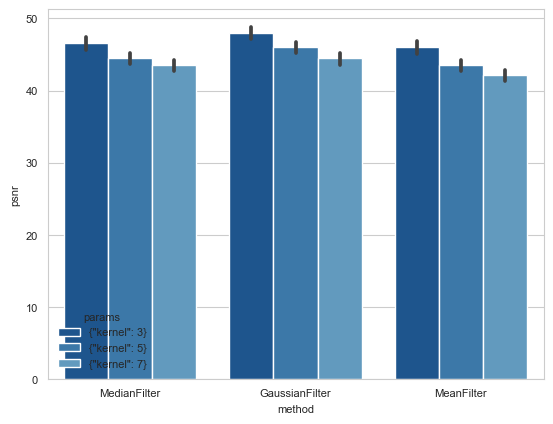

In [15]:
sns.barplot(data=evals, x='method', y='psnr', hue='params')

<Axes: xlabel='method', ylabel='ssim'>

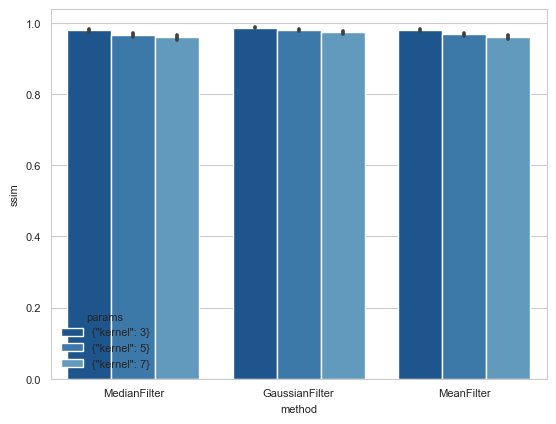

In [16]:
sns.barplot(data=evals, x='method', y='ssim', hue='params')